<a href="https://colab.research.google.com/github/Mannkp/Python-for-Data-Science/blob/main/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment Python for Data Science**
200410107070
Mannkumar Pandya

### Q-1) Take any data set. Do as directed using Python.

In [2]:
import numpy as np
import pandas as pd

from google.colab import files
file_upload = files.upload()
file_upload

Saving marks_test.csv to marks_test.csv


{'marks_test.csv': b'\xef\xbb\xbfSr No.,Name,Marks,Grade\r\n1,ABC,10,A\r\n2,DEF,9,A\r\n3,ABC,10,A\r\n4,JKL,,\r\n5,MNO,9.5,A\r\n6,PQR,10,A\r\n7,STU,6,B\r\n8,VWX,3,D\r\n9,YZA,8,B\r\n10,BCD,5,C\r\n'}

### 1. Take any data set. Do as directed using Python.
a. Find out what are different columns in the data set.

In [3]:
myFile = pd.read_csv("/content/marks_test.csv" , index_col=0) #we can use na_values = ['?' , '??' , '???' , '????'] -> to default assign null values as '?'
myFile

,Name,Marks,Grade
Sr No.,,,
1,ABC,10.0,A
2,DEF,9.0,A
3,ABC,10.0,A
4,JKL,NaN,NaN
5,MNO,9.5,A
6,PQR,10.0,A
7,STU,6.0,B
8,VWX,3.0,D
9,YZA,8.0,B


In [4]:
myFile.columns

Index(['Name', 'Marks', 'Grade'], dtype='object')

b. Check for missing data in it.

In [5]:
myFile.isnull()

,Name,Marks,Grade
Sr No.,,,
1,False,False,False
2,False,False,False
3,False,False,False
4,False,True,True
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


c. Fill the missing data if any using suitable values like mean, mode, etc.

In [6]:
myFile['Marks'] = myFile['Marks'].fillna(myFile['Marks'].mean())
myFile['Grade'] = myFile['Grade'].fillna("B")
myFile

,Name,Marks,Grade
Sr No.,,,
1,ABC,10.000000,A
2,DEF,9.000000,A
3,ABC,10.000000,A
4,JKL,7.833333,B
5,MNO,9.500000,A
6,PQR,10.000000,A
7,STU,6.000000,B
8,VWX,3.000000,D
9,YZA,8.000000,B


d. Find out duplicate records and remove them.

In [7]:
myFile.duplicated()

Sr No.
1     False
2     False
3      True
4     False
5     False
6     False
7     False
8     False
9     False
10    False
dtype: bool

In [8]:
myFile = myFile.drop_duplicates()
myFile

,Name,Marks,Grade
Sr No.,,,
1,ABC,10.000000,A
2,DEF,9.000000,A
4,JKL,7.833333,B
5,MNO,9.500000,A
6,PQR,10.000000,A
7,STU,6.000000,B
8,VWX,3.000000,D
9,YZA,8.000000,B
10,BCD,5.000000,C


In [9]:
myFile.duplicated() #to check if duplicates exists or not!

Sr No.
1     False
2     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
dtype: bool

e. Find out categorical field in the data set.

In [10]:
myFile['Grade'] = myFile['Grade'].astype('category')

myFile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 1 to 10
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Name    9 non-null      object  
 1   Marks   9 non-null      float64 
 2   Grade   9 non-null      category
dtypes: category(1), float64(1), object(1)
memory usage: 429.0+ bytes


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


f. Map categorical data to numeric using any encoding technique

In [11]:
pip install --upgrade category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
import category_encoders as ce
#using Ordinal Encoder for Grades.
myFile['Grade'].unique()
encoder= ce.OrdinalEncoder(cols=['Grade'],return_df=True, mapping=[{'col':'Grade', 'mapping':{'E':0,'A':1,'B':2,'C':3,'D':4}}])

myFile['transformed(Encoded_Category)'] = encoder.fit_transform(myFile['Grade'])

myFile

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Name,Marks,Grade,transformed(Encoded_Category)
Sr No.,,,,
1,ABC,10.000000,A,1
2,DEF,9.000000,A,1
4,JKL,7.833333,B,2
5,MNO,9.500000,A,1
6,PQR,10.000000,A,1
7,STU,6.000000,B,2
8,VWX,3.000000,D,4
9,YZA,8.000000,B,2
10,BCD,5.000000,C,3


g. Apply Pandas conditioning on the data set and display filtered records

In [13]:
print("***Using loc[]***\n",myFile.loc[1])
print("\n***Using iloc[]***\n",myFile.iloc[1])

***Using loc[]***
 Name                              ABC
Marks                            10.0
Grade                               A
transformed(Encoded_Category)       1
Name: 1, dtype: object

***Using iloc[]***
 Name                             DEF
Marks                            9.0
Grade                              A
transformed(Encoded_Category)      1
Name: 2, dtype: object


In [14]:
myFile[myFile['Grade'] == "A"]

,Name,Marks,Grade,transformed(Encoded_Category)
Sr No.,,,,
1,ABC,10.0,A,1
2,DEF,9.0,A,1
5,MNO,9.5,A,1
6,PQR,10.0,A,1


In [15]:
myFile[myFile['Marks'] >= 8]

,Name,Marks,Grade,transformed(Encoded_Category)
Sr No.,,,,
1,ABC,10.0,A,1
2,DEF,9.0,A,1
5,MNO,9.5,A,1
6,PQR,10.0,A,1
9,YZA,8.0,B,2


h. Plot different plots by identifying different dependant and non-dependant variables.

(Note: step-1: Import Data.\
       step-2: Remove rows containing any NULL values using "`df.dropna(axis=0,inplace=True)`"\
       step-3: start plotting the graph)

In [16]:
myFile

,Name,Marks,Grade,transformed(Encoded_Category)
Sr No.,,,,
1,ABC,10.000000,A,1
2,DEF,9.000000,A,1
4,JKL,7.833333,B,2
5,MNO,9.500000,A,1
6,PQR,10.000000,A,1
7,STU,6.000000,B,2
8,VWX,3.000000,D,4
9,YZA,8.000000,B,2
10,BCD,5.000000,C,3


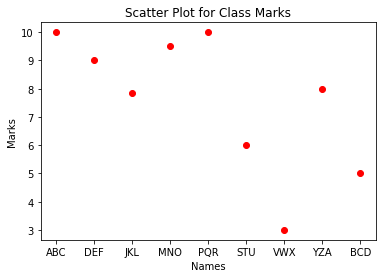

In [17]:
import matplotlib.pyplot as mplt

mplt.scatter(myFile['Name'],myFile['Marks'], color="red")
mplt.title('Scatter Plot for Class Marks')
mplt.xlabel('Names')
mplt.ylabel('Marks')
mplt.show()

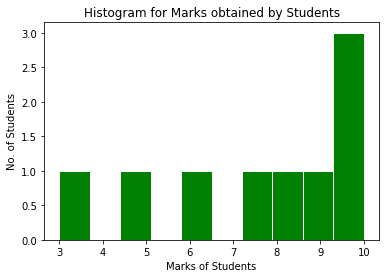

In [18]:
mplt.hist(myFile['Marks'],color='green',edgecolor='white')
mplt.title('Histogram for Marks obtained by Students')
mplt.xlabel('Marks of Students')
mplt.ylabel('No. of Students')
mplt.show()

In [19]:
count_a = 0
count_b = 0
count_c = 0
count_d = 0
for i in myFile['Grade']:
  if i == 'A':
    count_a += 1
  elif i=='B':
    count_b += 1
  elif i=='C':
    count_c += 1
  elif i=='D':
    count_d +=1


count_grades = [count_a,count_b,count_c,count_d]
count_grades

[4, 3, 1, 1]

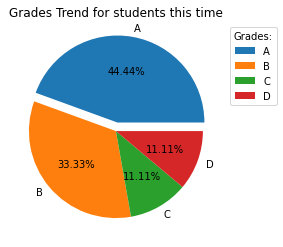


From the above chart we can see that more number of students have obtained "A" grade while only a few students have scored less Grades.


In [22]:
myexplode = [0.1,0,0,0]
mplt.pie(count_grades,labels = ['A','B','C','D'], explode=myexplode,autopct='%.2f%%')
mplt.title('Grades Trend for students this time')
mplt.legend(title='Grades:',bbox_to_anchor=(1,1))
mplt.show()
print("\nFrom the above chart we can see that more number of students have obtained \"A\" grade while only a few students have scored less Grades.")

### Q-2) Virat Kohli scored number of runs in different regions of the ground as follows:
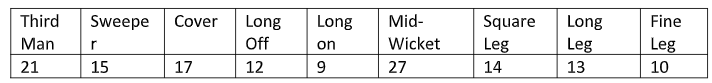
<br>If we need to plot the percentage of the runs scored by him in different region with respect to total runs scored by him, which plot would be best suitable for it? Plot it using matplotlib library of Python.

Pie chart is best suitable for showing data with Percentages.



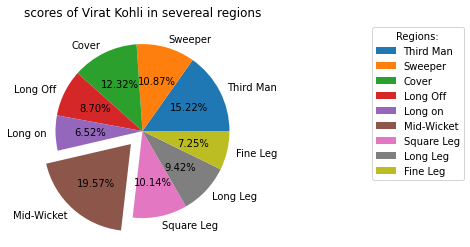

In [23]:
print("Pie chart is best suitable for showing data with Percentages.\n")

scores = [21,15,17,12,9,27,14,13,10]
Labels = ['Third Man','Sweeper','Cover','Long Off','Long on','Mid-Wicket','Square Leg','Long Leg','Fine Leg']
explosion = [0,0,0,0,0,0.2,0,0,0]
mplt.pie(scores,labels = Labels,autopct='%.2f%%',explode=explosion)
mplt.title("scores of Virat Kohli in severeal regions")
mplt.legend(title="Regions:",bbox_to_anchor=(2,1))
mplt.show()

### Q-3) Following is the statistics of the populations (in Crore) of India and China during 2015 – 21.<br>
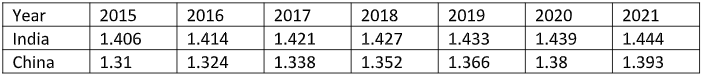<br>
Plot the graph showing difference between the growth of their population.

In [24]:
pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Bar charts are good for comparisons, Hence we will use "Bar" chart for this comparision.


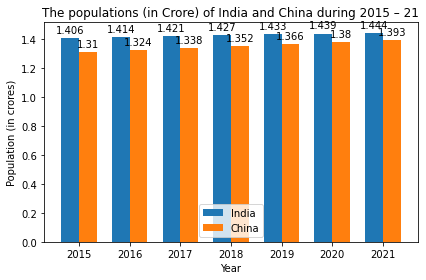

In [25]:
import numpy as np
print("Bar charts are good for comparisons, Hence we will use \"Bar\" chart for this comparision.")

India = [1.406,1.414,1.421,1.427,1.433,1.439,1.444]
China = [1.31,1.324,1.338,1.352,1.366,1.38,1.393]
Year = [2015,2016,2017,2018,2019,2020,2021]

x = np.arange(len(Year))  # the label locations
width = 0.35  # the width of the bars

fig, ax = mplt.subplots()

rects1 = ax.bar(x - width/2, India, width, label='India')
rects2 = ax.bar(x + width/2, China, width, label='China')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Year')
ax.set_ylabel('Population (in crores)')
ax.set_title('The populations (in Crore) of India and China during 2015 – 21')
ax.set_xticks(x, Year)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

mplt.show()